# Task 1: Data Ingestion and  Data Preprocessing

In [18]:
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 299.9/299.9 kB 883.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import asyncio
import nest_asyncio
import pandas as pd
from telethon import TelegramClient
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
import re
import os
import sys
import matplotlib.pyplot as plt 
import seaborn as sns   
sys.path.append(os.path.abspath("../scripts"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("..") 

In [3]:
from config import api_id , api_hash, session_name, cutoff_date, channels

Deleted old session file amharic_session.session


In [5]:
# session_file = session_name + '.session'
# if os.path.exists(session_file):
#     os.remove(session_file)
#     print(f"Deleted old session file {session_file}")

In [6]:
# 7. Amharic text cleaning function
def clean_amharic(text):
    if not text:
        return ""
    # Keep only Amharic unicode block and spaces
    text = re.sub(r'[^\u1200-\u137F\s]', '', text)
    # Normalize multiple spaces to single space
    return re.sub(r'\s+', ' ', text).strip()

# 8. Initialize Telegram client
client = TelegramClient(session_name, api_id, api_hash)

# 9. Async function to fetch and save data
async def fetch_and_save_messages():
    await client.start()
    print("✅ Telegram client started.")

    all_records = []

    for channel in channels:
        print(f" Fetching from channel: {channel}")
        try:
            async for msg in client.iter_messages(channel, offset_date=cutoff_date, limit=100 ):
                text = clean_amharic(msg.message or "")
                record = {
                    'channel': channel,
                    'timestamp': msg.date.strftime('%Y-%m-%d %H:%M:%S'),
                    'sender_id': msg.sender_id,
                    'text': text,

                }
                all_records.append(record)
        except Exception as e:
            print(f" Error fetching {channel}: {e}")

    # Create DataFrame and save to CSV
    df = pd.DataFrame(all_records)
    csv_path = "Data/telegram_amharic_messages.csv"
    df.to_csv(csv_path, index=False, encoding='utf-8-sig')
    print(f"Saved {len(df)} messages to {csv_path}")

    # Show Output data
    print(" Output data:")
    print(df.head(10))

# 10. Run the async function in notebook environment
await fetch_and_save_messages()

Signed in successfully as የእቴቴ ልጅ; remember to not break the ToS or you will risk an account ban!
✅ Telegram client started.
 Fetching from channel: EthioMart
 Fetching from channel: forfreemarket
 Fetching from channel: helloomarketethiopia
 Fetching from channel: classybrands
 Fetching from channel: kuruwear
Saved 500 messages to Data/telegram_amharic_messages.csv
 Output data:
     channel            timestamp      sender_id text
0  EthioMart  2022-02-07 21:05:18 -1001204279885     
1  EthioMart  2022-02-07 21:05:18 -1001204279885     
2  EthioMart  2022-01-22 19:24:00 -1001204279885     
3  EthioMart  2022-01-22 19:24:00 -1001204279885     
4  EthioMart  2021-07-13 13:29:27 -1001204279885     
5  EthioMart  2021-07-04 21:58:12 -1001204279885     
6  EthioMart  2021-07-04 21:53:26 -1001204279885     
7  EthioMart  2021-07-03 19:02:06 -1001204279885     
8  EthioMart  2021-07-03 19:02:06 -1001204279885     
9  EthioMart  2021-07-03 19:01:59 -1001204279885     


In [7]:
df = pd.read_csv("Data/telegram_amharic_messages.csv")
df

,channel,timestamp,sender_id,text
0,EthioMart,2022-02-07 21:05:18,-1001204279885,NaN
1,EthioMart,2022-02-07 21:05:18,-1001204279885,NaN
2,EthioMart,2022-01-22 19:24:00,-1001204279885,NaN
3,EthioMart,2022-01-22 19:24:00,-1001204279885,NaN
4,EthioMart,2021-07-13 13:29:27,-1001204279885,NaN
...,...,...,...,...
495,kuruwear,2024-03-06 12:12:52,-1001263223629,ንፁ ቆዳ የተሰሩ ጫማዎች የሀገራችን ምርት ብር ብቻ ቦሌ መደሐንያለም ኦሮ...
496,kuruwear,2024-02-24 12:28:13,-1001263223629,ንፁ ቆዳ የተሰሩ ጫማዎች የሀገራችን ምርት ብር ብቻ ቦሌ መደሐንያለም ኦሮ...
497,kuruwear,2024-02-17 13:26:08,-1001263223629,ንፁ ቆዳ የተሰሩ ጫማዎች የሀገራችን ምርት ብር ብቻ ቦሌ መደሐንያለም ኦሮ...
498,kuruwear,2024-02-17 13:25:36,-1001263223629,ንፁ ቆዳ የተሰሩ ጫማዎች የሀገራችን ምርት ብር ብቻ ቦሌ መደሐንያለም ኦሮ...


In [9]:
# Display basic info
print("Dataset Overview:")
print(df.info())
print("\Sample Messages:")
print(df["text"].head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   channel    500 non-null    object
 1   timestamp  500 non-null    object
 2   sender_id  500 non-null    int64 
 3   text       214 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB
None
\Sample Messages:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: text, dtype: object


Message Length Analysis

In [11]:
# Add message length column
df["Text_Length"] = df["text"].astype(str).apply(len)
df["Word_Count"] = df["text"].astype(str).apply(lambda x: len(x.split()))

# Describe lengths
print(" Message Length Stats:")
print(df[["Text_Length", "Word_Count"]].describe())


 Message Length Stats:
       Text_Length  Word_Count
count   500.000000  500.000000
mean     44.458000   10.180000
std      64.011399   14.079064
min       3.000000    1.000000
25%       3.000000    1.000000
50%       3.000000    1.000000
75%      82.000000   20.000000
max     363.000000   80.000000


Plot Message Length Distribution

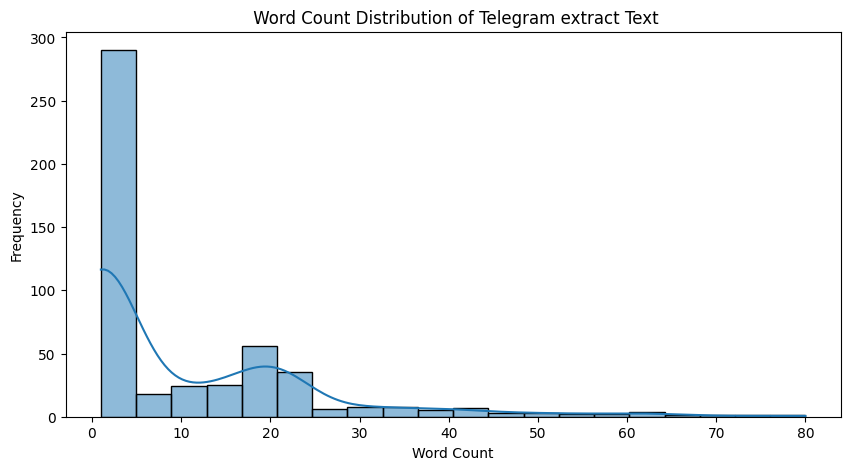

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Word_Count"], bins=20, kde=True)
plt.title(" Word Count Distribution of Telegram extract Text")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

Most frequent words

Top 10 Frequent Words:
[('ለማዘዝ', 129), ('ይሁኑ', 109), ('ብር', 108), ('ይጠቀሙ', 92), ('ኛ', 84), ('ፎቅ', 84), ('ቢሮ', 78), ('ቁ', 78), ('ምርት', 76), ('ጫማ', 76)]


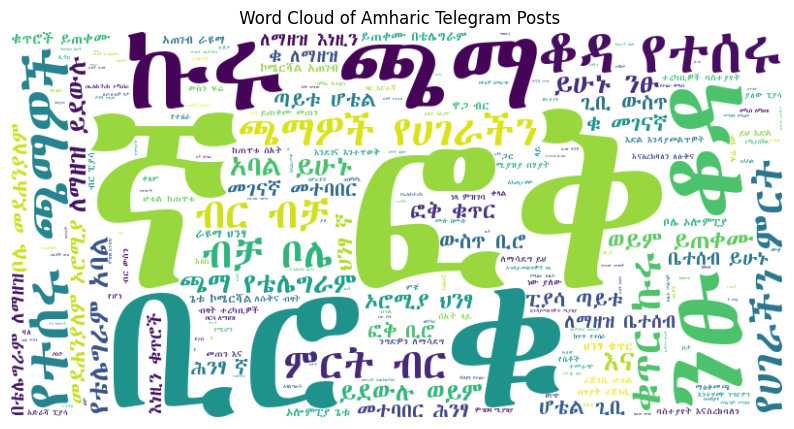

In [24]:
all_words = " ".join(df["text"].dropna().astype(str)).split()
word_freq = Counter(all_words)

# Top 10 words
print("Top 10 Frequent Words:")
print(word_freq.most_common(10))

# Wordcloud
wordcloud = WordCloud(font_path="Data\AbyssinicaSIL-Regular.ttf",
                      width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(" Word Cloud of Amharic Telegram Posts")
plt.show()

Timestamps

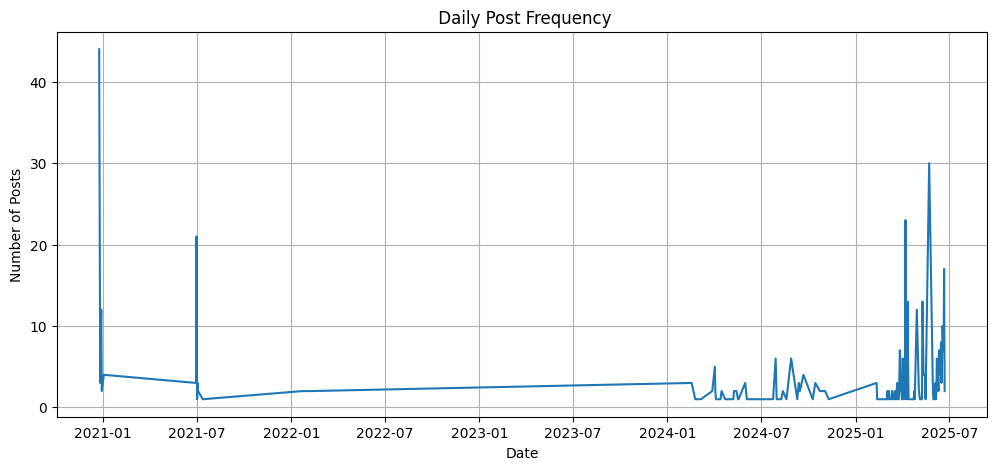

In [26]:
if "timestamp" in df.columns:
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["date"] = df["timestamp"].dt.date

    # Daily post count
    daily_count = df.groupby("date").size()

    plt.figure(figsize=(12, 5))
    daily_count.plot()
    plt.title(" Daily Post Frequency")
    plt.xlabel("Date")
    plt.ylabel("Number of Posts")
    plt.grid(True)
    plt.show()

Price & Location Mention Counts

In [28]:
price_keywords = ["ብር", "ዋጋ", "በ"]  # refine based on your labeling
df["has_price"] = df["text"].apply(lambda x: any(p in str(x) for p in price_keywords))

print("💸 Messages with Price Info:", df["has_price"].sum())

💸 Messages with Price Info: 169


Cleaning the data

In [33]:
df = df.dropna(subset=["text"])

In [37]:
df['text'].head(100)

11     ፎርኤቨር ብራይት፦ ለጥርስዎ ጥንካሬ ፅዳት እና ንጣት በአንድ የያዘ ከሬት...
12     አሎይ ስቲክ ዲዬድራንት፦ ሽታን ያጠፋል የብብት ጥቁረትን ያጠፋል መዓዛው ...
13     አሎይ ሊፕስ፦ ጥሩ መዓዛ ያለው ከንፈርን ለማለስለስ እና እንዳይደርቅ ያግ...
33                                              ለፀጉር ለፂም
100    የበርየሻወር ቤት ምንጣፍ ከፍተኛ ውሃ የመምጠጥ አቅም ያለው የማይንሸራተት...
                             ...                        
260    የሀገር ውስጥ አምራቾች ከሆናችሁ ይህ ቪድዮ ለናንተ ነው እንደገና እንተዋ...
261    ሁለት ሲገዙ ቅናሽ ሙሉ በሙሉ የመኝታ ቤትዎን ውበት የሚጨምር አነሶላ ለማ...
266    ሰላም ሰላም እንደገና እንተዋወቅ የእርስዎን ሽያጭ ለማሳደግ እና ግብይቶን...
267    ሰላም ሰላም እንደገና እንተዋወቅ የእርስዎን ሽያጭ ለማሳደግ እና ግብይቶን...
268    ከለውዝ እና ከኦትስ በሁለት አይነት በጣፋጭ ጠዕም የቀረበ ጉርሻ እስናክ ...
Name: text, Length: 100, dtype: object

In [38]:
df['text'].shape

(214,)

In [40]:
df = df.dropna(axis=1, how='all')
df.shape

(214, 10)

In [43]:
def save_to_conll(messages, output_file="Data/telegram_amharic_messages.conll"):
    # Ensure the output directory exists
    os.makedirs(os.path.dirname(output_file), exist_ok=True)

    try:
        with open(output_file, "w", encoding="utf-8") as f:
            for msg in messages:
                words = msg.strip().split()
                for word in words:
                    f.write(f"{word} O\n")  # Default tag is O (outside any entity)
                f.write("\n")  # Blank line to separate messages
        print(f"Saved {len(messages)} messages to {output_file}")
    except Exception as e:
        print(f" Failed to save data: {e}")

In [45]:
# all_texts = ["የህፃን ጫማ አዲስ ነው", "ዋጋ 1000 ብር ብቻ", "አድራሻ ቦሌ መቶ ሳምንት"]
all_texts = df['text']
save_to_conll(all_texts)

Saved 214 messages to Data/telegram_amharic_messages.conll
